In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt


      Unzipping tokenizers/punkt.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [22]:
df = pd.read_csv('Reviews.csv')[:501]

In [23]:
df.shape

(501, 10)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      501 non-null    int64 
 1   ProductId               501 non-null    object
 2   UserId                  501 non-null    object
 3   ProfileName             501 non-null    object
 4   HelpfulnessNumerator    501 non-null    int64 
 5   HelpfulnessDenominator  501 non-null    int64 
 6   Score                   501 non-null    int64 
 7   Time                    501 non-null    int64 
 8   Summary                 501 non-null    object
 9   Text                    501 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.3+ KB


In [25]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


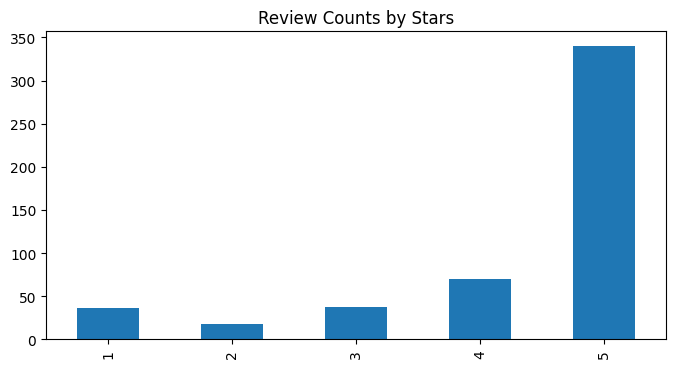

In [38]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',title='Review Counts by Stars', figsize=(8,4))

ax.set_label('Review Stars')
plt.show()

In [50]:
eg = df['Text'][35]
eg

"McCann's Instant Irish Oatmeal, Variety Pack of Regular, Apples & Cinnamon, and Maple & Brown Sugar, 10-Count Boxes (Pack of 6)<br /><br />I'm a fan of the McCann's steel-cut oats, so I thought I'd give the instant variety a try. I found it to be a hardy meal, not too sweet, and great for folks like me (post-bariatric surgery) who need food that is palatable, easily digestible, with fiber but won't make you bloat."

In [52]:
# Tokenization
tokens = nltk.word_tokenize(eg)
tokens[:15]

['McCann',
 "'s",
 'Instant',
 'Irish',
 'Oatmeal',
 ',',
 'Variety',
 'Pack',
 'of',
 'Regular',
 ',',
 'Apples',
 '&',
 'Cinnamon',
 ',']

In [58]:
# Parts OF Speech Detection
tags = nltk.pos_tag(tokens)
tags[:10]

[('McCann', 'NNP'),
 ("'s", 'POS'),
 ('Instant', 'NNP'),
 ('Irish', 'NNP'),
 ('Oatmeal', 'NNP'),
 (',', ','),
 ('Variety', 'NNP'),
 ('Pack', 'NNP'),
 ('of', 'IN'),
 ('Regular', 'NNP')]

In [ ]:
nltk.download()

In [65]:
entites = nltk.chunk.ne_chunk(tags)
entites.pprint()

(S
  (PERSON McCann/NNP)
  's/POS
  (ORGANIZATION Instant/NNP Irish/NNP Oatmeal/NNP)
  ,/,
  (PERSON Variety/NNP Pack/NNP)
  of/IN
  (GPE Regular/NNP)
  ,/,
  (PERSON Apples/NNP)
  &/CC
  (PERSON Cinnamon/NNP)
  ,/,
  and/CC
  (PERSON Maple/NNP)
  &/CC
  (PERSON Brown/NNP Sugar/NNP)
  ,/,
  10-Count/JJ
  (GPE Boxes/NNP)
  (/(
  (ORGANIZATION Pack/NNP)
  of/IN
  6/CD
  )/)
  </NN
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  I/PRP
  'm/VBP
  a/DT
  fan/NN
  of/IN
  the/DT
  (ORGANIZATION McCann/NNP)
  's/POS
  steel-cut/JJ
  oats/NNS
  ,/,
  so/IN
  I/PRP
  thought/VBD
  I/PRP
  'd/MD
  give/VB
  the/DT
  instant/JJ
  variety/NN
  a/DT
  try/NN
  ./.
  I/PRP
  found/VBD
  it/PRP
  to/TO
  be/VB
  a/DT
  hardy/JJ
  meal/NN
  ,/,
  not/RB
  too/RB
  sweet/JJ
  ,/,
  and/CC
  great/JJ
  for/IN
  folks/NNS
  like/IN
  me/PRP
  (/(
  post-bariatric/JJ
  surgery/NN
  )/)
  who/WP
  need/VBP
  food/NN
  that/WDT
  is/VBZ
  palatable/JJ
  ,/,
  easily/RB
  digestible/JJ
  ,/,
  with

In [68]:
# The Vaders Model

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [71]:
sia = SentimentIntensityAnalyzer()

In [76]:
sia.polarity_scores("Welcome to the New Year")

{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.4588}

In [77]:
sia.polarity_scores(eg)

{'neg': 0.024, 'neu': 0.821, 'pos': 0.155, 'compound': 0.7622}

In [87]:
# Run the polarity score the entire dataset
result = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  result[myid] = sia.polarity_scores(text)

  0%|          | 0/501 [00:00<?, ?it/s]

In [104]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [106]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


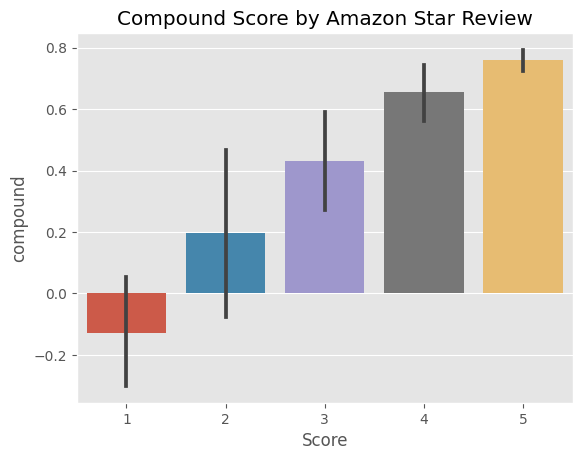

In [107]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

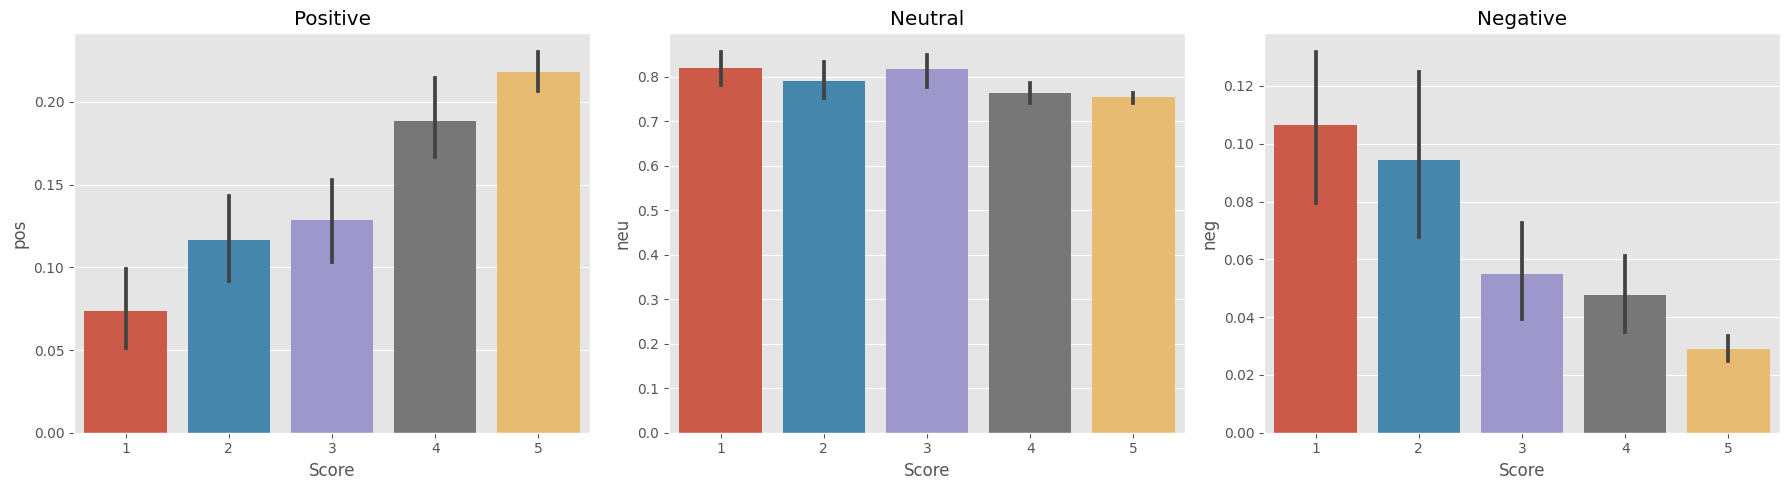

In [115]:
fig,axs = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [117]:
# RoBerta Model

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [119]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [122]:
print(eg)
sia.polarity_scores(eg)

McCann's Instant Irish Oatmeal, Variety Pack of Regular, Apples & Cinnamon, and Maple & Brown Sugar, 10-Count Boxes (Pack of 6)<br /><br />I'm a fan of the McCann's steel-cut oats, so I thought I'd give the instant variety a try. I found it to be a hardy meal, not too sweet, and great for folks like me (post-bariatric surgery) who need food that is palatable, easily digestible, with fiber but won't make you bloat.


{'neg': 0.024, 'neu': 0.821, 'pos': 0.155, 'compound': 0.7622}

In [127]:
enc_text = tokenizer(eg, return_tensors='pt')
output = model(**enc_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2],
}
scores_dict

In [153]:
def polarity_Score_Roberta(eg):
  enc_text = tokenizer(eg, return_tensors='pt')
  output = model(**enc_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg': scores[0],
      'roberta_neu': scores[1],
      'roberta_pos': scores[2],
  }
  return scores_dict

In [154]:
res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['Text']
    my_id = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_Score_Roberta(text)
    both = vader_result_rename | roberta_result
    res[my_id] = both
  except RuntimeError:
    print(f'Broke for id {my_id}')

  0%|          | 0/501 [00:00<?, ?it/s]

Broke for id 501
Broke for id 501


In [ ]:
res

In [ ]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index':'Id'})
result_df = result_df.merge(df, how='left')
result_df

In [157]:
result_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'index', 'ProductId',
       'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

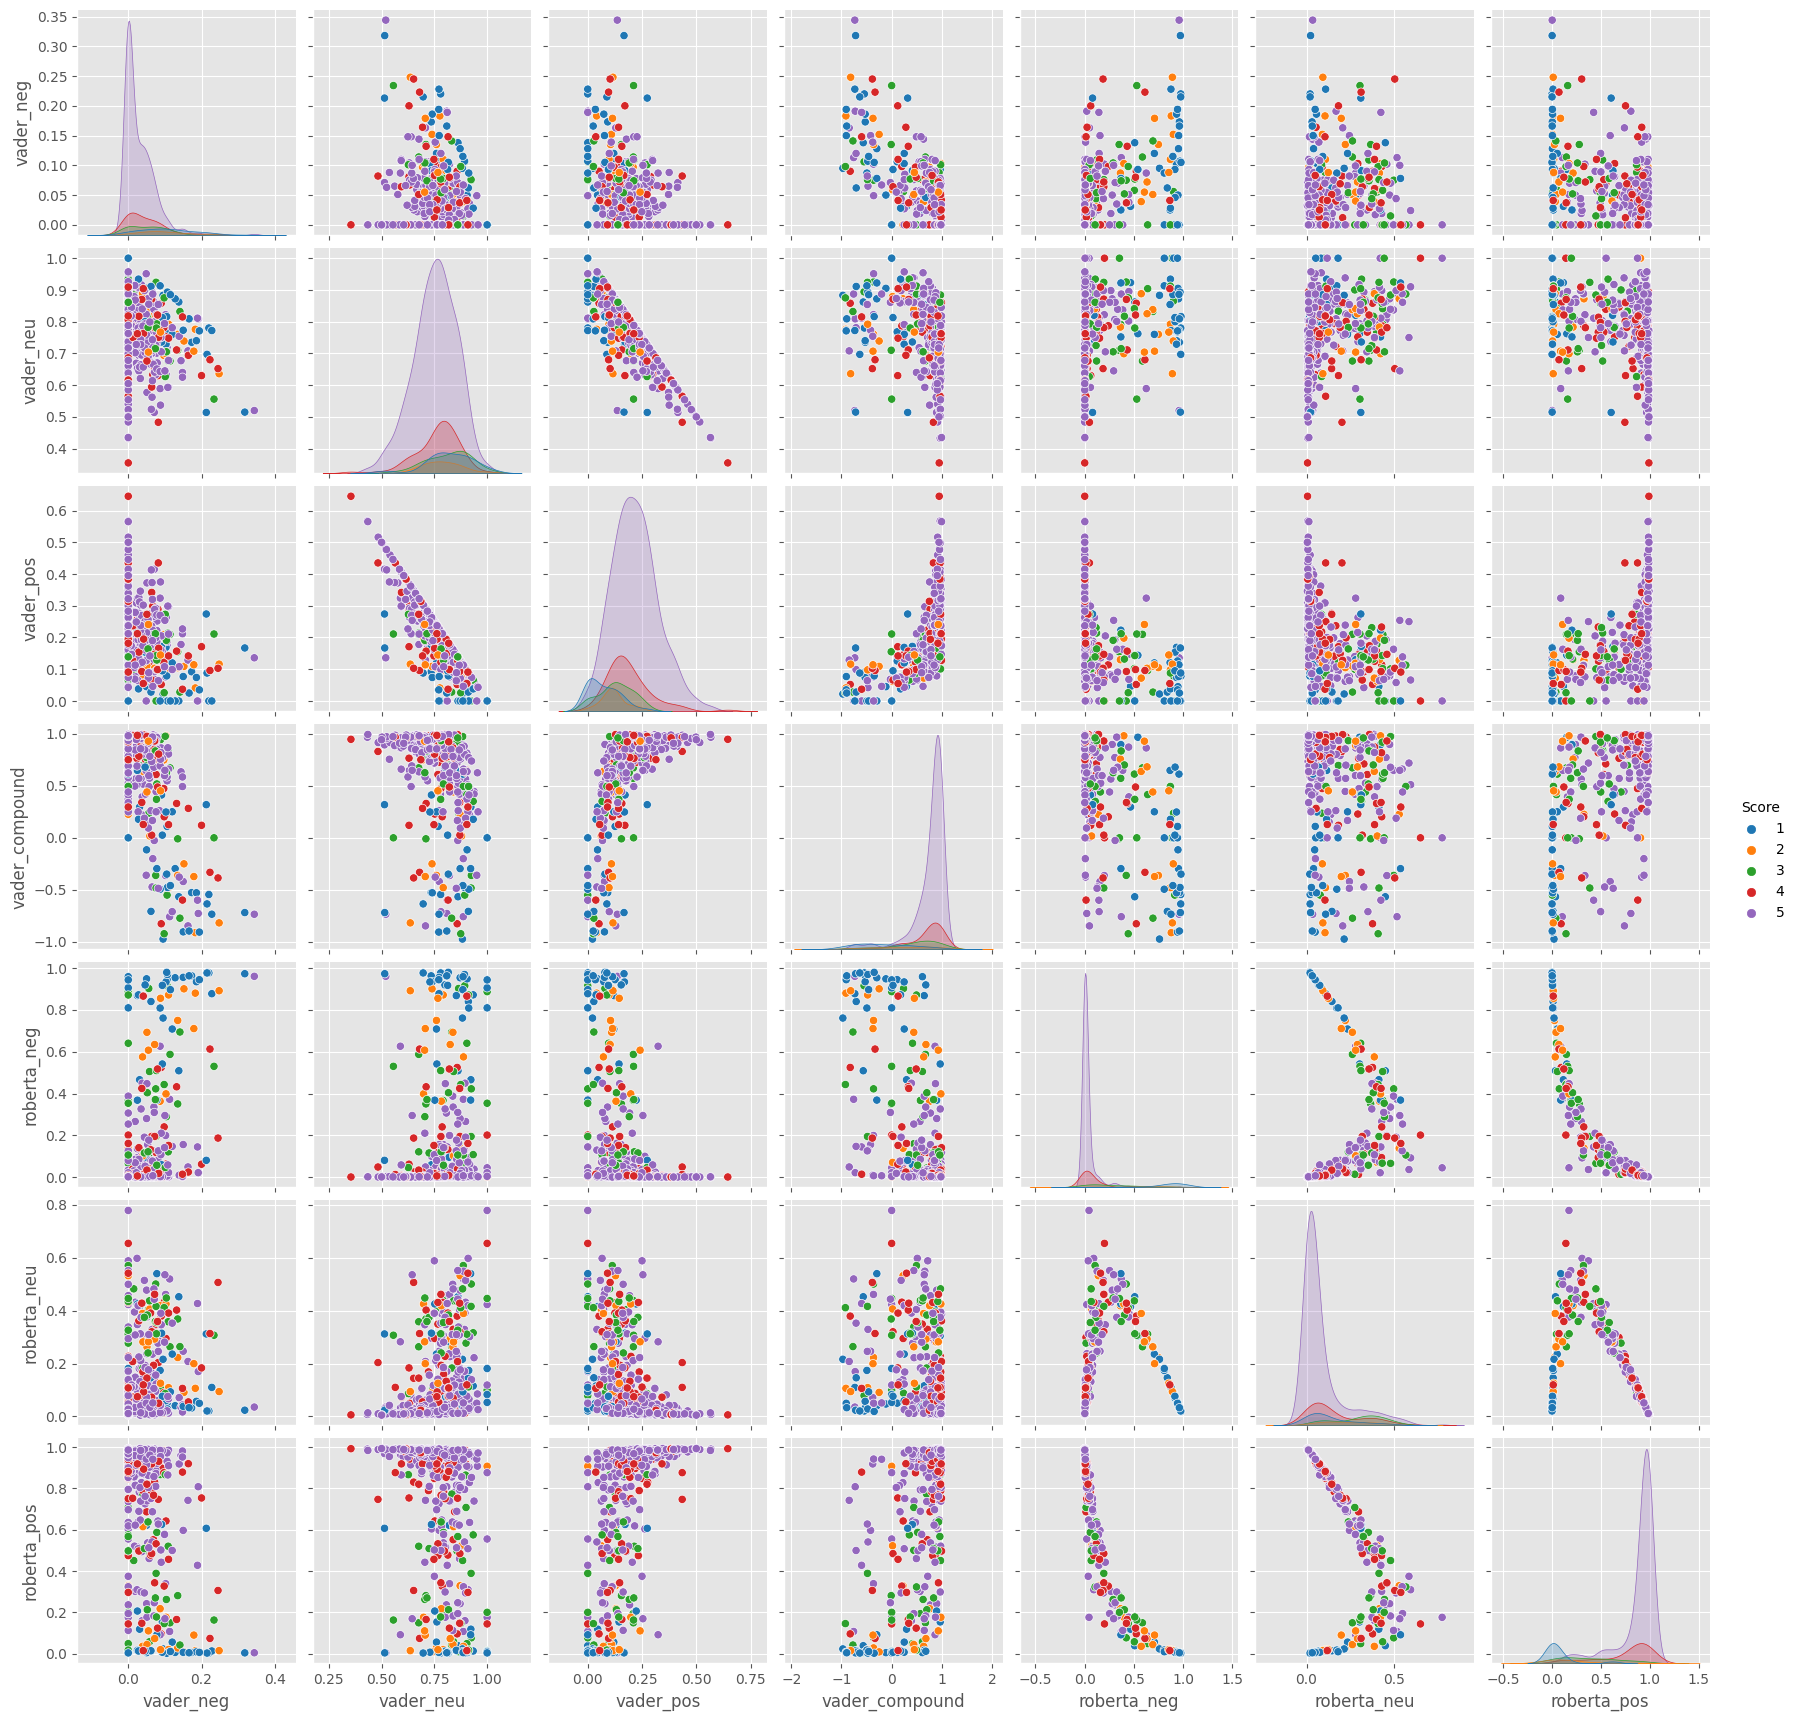

In [162]:
sns.pairplot(data=result_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10'
             )
plt.show()

In [171]:
result_df.query('Score == 5').sort_values('vader_pos', ascending=False)['Text'].values[0]

'This is an great product. The taste is great, and it works exactly as described. Superb natural sleep aid. AMAZING!'

In [174]:
from transformers import pipeline

sentiment_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [181]:
sentiment_pipeline('Thank you for the game.')

[{'label': 'POSITIVE', 'score': 0.9998457431793213}]